# Algerian Forest Fires



## 📄 Dataset Overview

This dataset contains **244 instances** collected from **two regions in Algeria**:

- **Bejaia** (northeast)
- **Sidi Bel-Abbes** (northwest)

Each region contributes **122 instances**, recorded during the **summer fire season from June to September 2012**.

The dataset includes:

- **11 input attributes** (weather + FWI indicators)
- **1 output class attribute** (`Fire` or `Not Fire`)

Out of 244 total instances:
- **138** are labeled as **Fire**
- **106** are labeled as **Not Fire**

---

## 📅 Time Period

- **From:** June 2012  
- **To:** September 2012

---

## 📊 Attribute Description

| Attribute | Description |
|-----------|-------------|
| `Date`    | Date in format `DD/MM/YYYY` |
| `month`   | Month name (`June` to `September`) |
| `Temp`    | Temperature at noon (°C) – range: **22 to 42** |
| `RH`      | Relative Humidity (%) – range: **21 to 90** |
| `Ws`      | Wind Speed (km/h) – range: **6 to 29** |
| `Rain`    | Total daily rainfall (mm) – range: **0 to 16.8** |
| `FFMC`    | Fine Fuel Moisture Code – range: **28.6 to 92.5** |
| `DMC`     | Duff Moisture Code – range: **1.1 to 65.9** |
| `DC`      | Drought Code – range: **7 to 220.4** |
| `ISI`     | Initial Spread Index – range: **0 to 18.5** |
| `BUI`     | Buildup Index – range: **1.1 to 68** |
| `FWI`     | Fire Weather Index – range: **0 to 31.1** |
| `Classes` | Fire occurrence class: **`Fire`** or **`Not Fire`** |

---

## 🎯 Use Cases

This dataset is ideal for:

- Fire risk prediction
- Weather pattern analysis
- Classification and time series modeling
- Testing Fire Weather Index (FWI) modeling performance

---

> 📌 *Note: The dataset includes multiple fire weather indices from the Canadian FWI System, which are useful for building interpretable fire prediction models.*


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1)
df.iloc[0:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [10]:
df.describe().transpose()

,count,unique,top,freq
day,246,33,01,8
month,245,5,07,62
year,245,2,2012,244
Temperature,245,20,35,29
RH,245,63,55,10
Ws,245,19,14,43
Rain,245,40,0,133
FFMC,245,174,88.9,8
DMC,245,167,7.9,5
DC,245,199,8,5


## Data Cleaning

In [15]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [16]:
df.loc[:122,'Region']=0
df.loc[122:, 'Region']=1

In [17]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [18]:
df['Region']=df['Region'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [20]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [21]:
df = df.dropna().reset_index(drop=True)

In [22]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [24]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [25]:
#Remove second header line
df=df.drop(122).reset_index(drop=True)

In [26]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
#remove spaces from column names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
### Change required data type on int columns
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [33]:
#take the rest of object type columns and transform to float except for 'Classes'
objects = [features for features in df.columns if df[features].dtype == 'O']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [34]:
for i in objects:
    if i != 'Classes':
        df[i]=df[i].astype(float)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [40]:
##Save the clean dataset in a new csv file
df.to_csv('Algerian_forest_fire_clean.csv', index= False)

## Exploratory Data analysis

In [42]:
df2 = df.drop(['day','month','year'], axis=1)
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
## Categories in classes
## We should only have 2 classes "fire" and "not fire" so we are handle that in the encoding
df2['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [44]:
#Encoding of categories Classes
df2['Classes'] = np.where(df2['Classes'].str.contains('not fire'),0,1)

In [46]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [47]:
df2['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

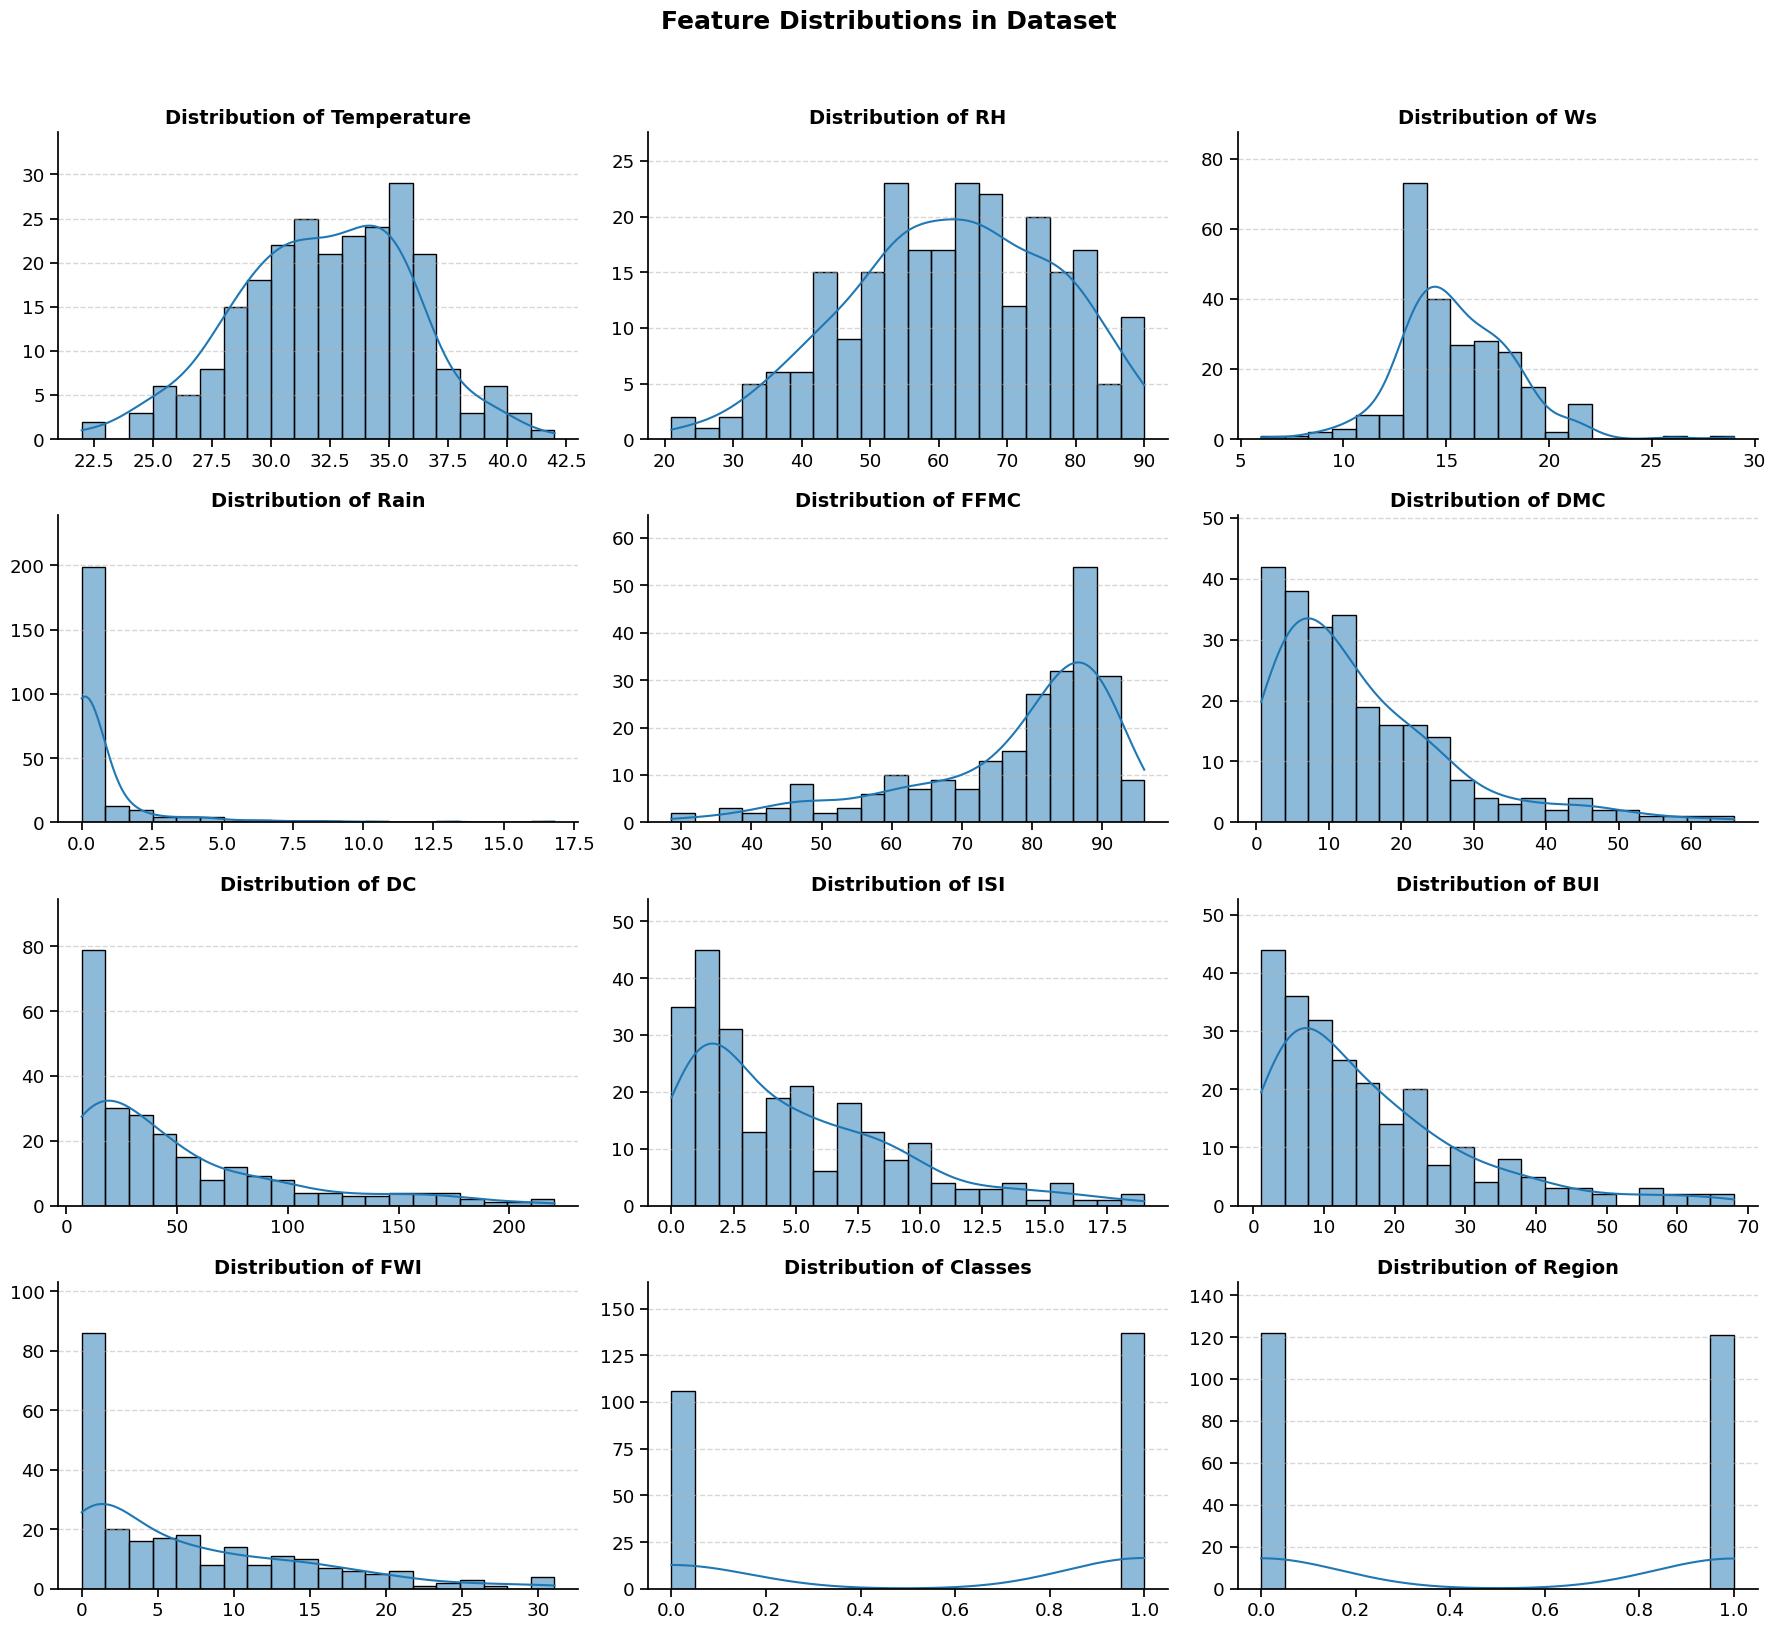

In [67]:
# Set style
plt.style.use("default")
sns.set_context("notebook", font_scale=1.2)

# Plot each numeric feature as a clean histogram
num_cols = df2.select_dtypes(include='number').columns
n_cols = 3
n_rows = -(-len(num_cols) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.histplot(df2[col], bins=20, kde=True, color='#1f77b4', ax=ax)
    
    # Title and clean labels
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Remove clutter
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Optional: Add percentage y-axis
    counts, _ = np.histogram(df2[col], bins=20)
    max_count = counts.max()
    ax.set_ylim(top=max_count * 1.2)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Feature Distributions in Dataset', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [74]:
# Select numeric columns
num_cols = df2.select_dtypes(include='number').columns

# Loop to generate interactive histograms
for col in num_cols:
    fig = px.histogram(
        df2,
        x=col,
        nbins=20,
        title=f'Distribution of {col}',
        color_discrete_sequence=['#1f77b4'],
        opacity=0.8,
        marginal='rug',  # optional
        histnorm='percent'  # ✅ Set here, not in update_traces!
    )

    # Optional: layout cleanup
    fig.update_layout(
        title_font_size=20,
        title_font_family='Arial',
        xaxis_title='',
        yaxis_title='Percentage',
        showlegend=False,
        bargap=0.05
    )

    fig.show()

In [57]:
percentage = df2['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

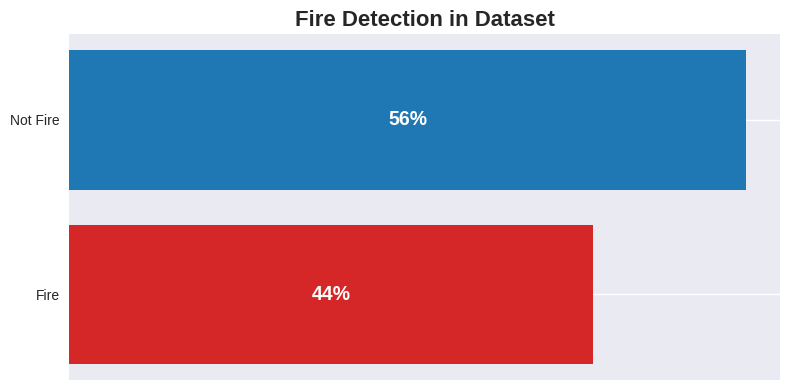

In [65]:
categories = ['Not Fire', 'Fire']
values = percentage  # Example: out of 1000 images

# Highlight 'Fire'
colors = ['#1f77b4' if label == 'Not Fire' else '#d62728' for label in categories]

# Create figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot
bars = ax.barh(categories, values, color=colors)

# Add annotations
for bar in bars:
    width = bar.get_width()
    label = f"{width/100:.0%}"
    ax.text(width / 2, bar.get_y() + bar.get_height() / 2,
            label, ha='center', va='center', color='white', fontsize=14, fontweight='bold')

# Title and message
ax.set_title('Fire Detection in Dataset', fontsize=16, fontweight='bold')


# Clean aesthetics
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.xaxis.set_visible(False)

# Invert y-axis so 'Fire' is at top
ax.invert_yaxis()

plt.tight_layout()
plt.show()


## 📊 Correlation

**Correlation** is a measure of the linear relationship between two variables. It quantifies how much one variable changes with respect to another.

- **Range:** -1 (perfect negative) to +1 (perfect positive)
- **0** indicates no linear correlation.

| Coefficient | Interpretation              |
|-------------|------------------------------|
| 0.9 to 1.0  | Very strong positive         |
| 0.7 to 0.9  | Strong positive              |
| 0.5 to 0.7  | Moderate positive            |
| 0.3 to 0.5  | Weak positive                |
| 0.0 to 0.3  | Negligible                   |
| -1.0 to -0.9| Very strong negative         |
| ...         | (Same scale applies in reverse for negative) |

### 🔍 Why is it important?

- Helps detect **relationships** between features.
- Useful for **feature selection** in machine learning.
- Can improve **model performance** by identifying redundant variables.



In [75]:
df2.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


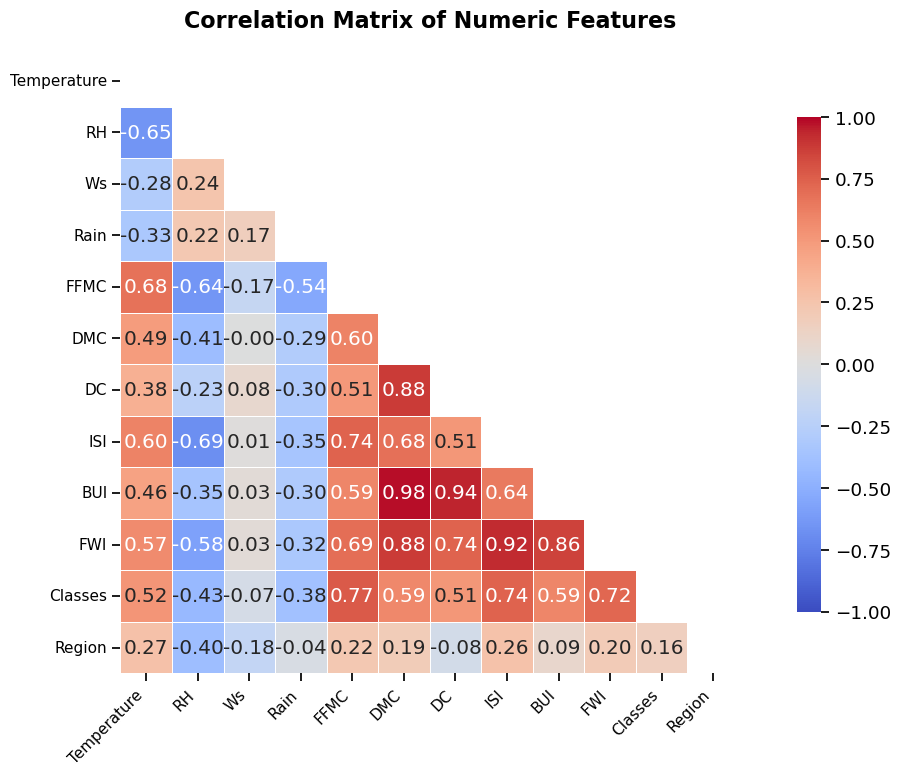

In [78]:
# Compute correlation matrix
corr = df2.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure
plt.figure(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.2)

# Draw the heatmap with the mask and customizations
sns.heatmap(
    corr,
    mask=mask,                  # Apply the mask
    annot=True,                 # Show values
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8}
)

# Titles and styling
plt.title("Correlation Matrix of Numeric Features", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Clean edges
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


## Monthly Fire Analysis

Its observed that most of the fires occurr in the first 3 months in late spring and summer.
August is the month with major incidence of fire

In [83]:
months = list(df['month'].unique())

In [86]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire', 'fire')

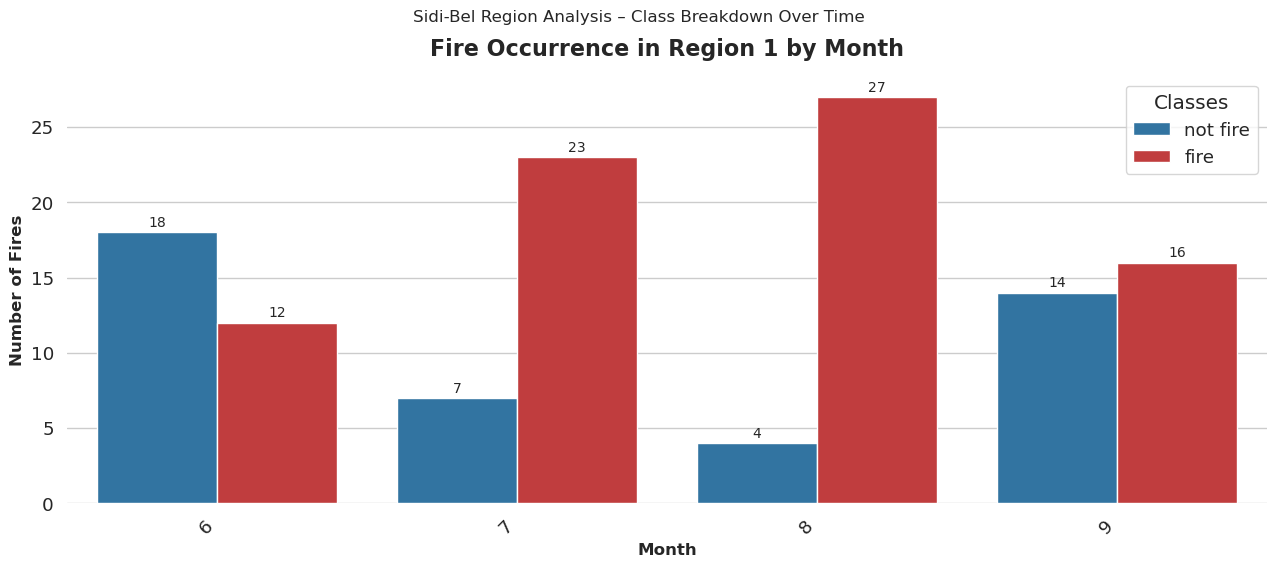

In [93]:
# Filter the region
df_temp = df.loc[df['Region'] == 1]

# Define custom colors: 'Fire' = red, 'Not Fire' = gray
custom_palette = {
    'fire': '#d62728',       # strong red
    'not fire': '#1F77B4'    # 
}

# Set up the plot
plt.figure(figsize=(13, 6))
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Create the count plot
ax = sns.countplot(
    data=df_temp,
    x='month',
    hue='Classes',
    palette=custom_palette
)

# Labels and title
ax.set_ylabel('Number of Fires', weight='bold', fontsize=12)
ax.set_xlabel('Month', weight='bold', fontsize=12)
ax.set_title('Fire Occurrence in Region 1 by Month', fontsize=16, weight='bold', pad=15)
plt.suptitle('Sidi-Bel Region Analysis – Class Breakdown Over Time', fontsize=12, y=0.95)

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Clean look
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

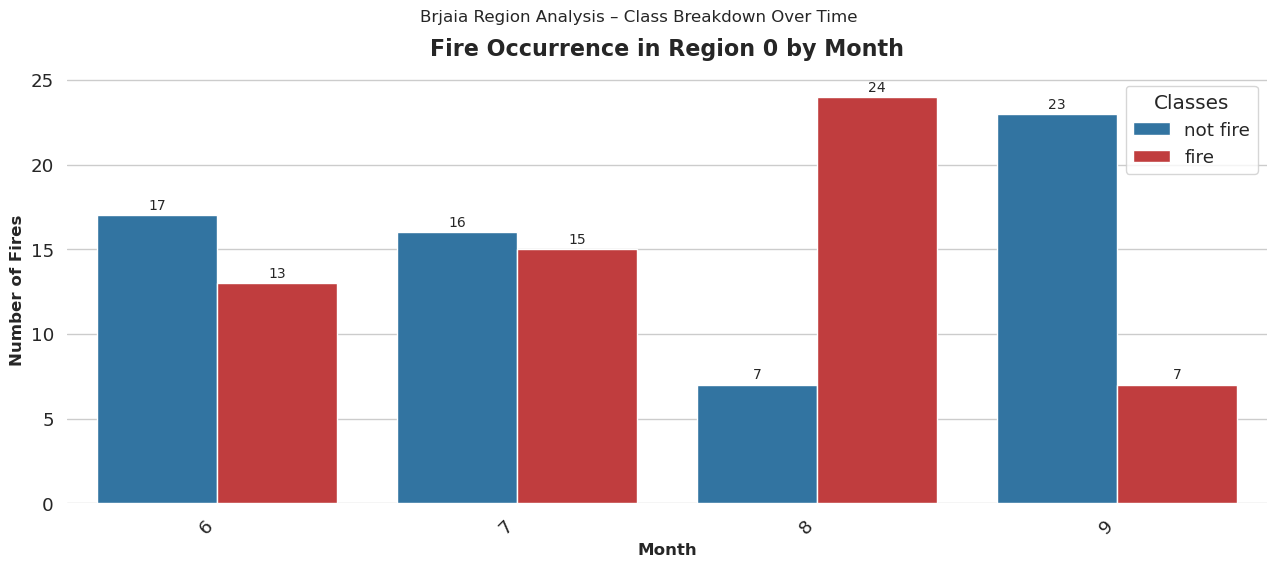

In [95]:
# Filter the region
df_temp = df.loc[df['Region'] == 0]

# Define custom colors: 'Fire' = red, 'Not Fire' = gray
custom_palette = {
    'fire': '#d62728',       # strong red
    'not fire': '#1F77B4'    # 
}

# Set up the plot
plt.figure(figsize=(13, 6))
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Create the count plot
ax = sns.countplot(
    data=df_temp,
    x='month',
    hue='Classes',
    palette=custom_palette
)

# Labels and title
ax.set_ylabel('Number of Fires', weight='bold', fontsize=12)
ax.set_xlabel('Month', weight='bold', fontsize=12)
ax.set_title('Fire Occurrence in Region 0 by Month', fontsize=16, weight='bold', pad=15)
plt.suptitle('Brjaia Region Analysis – Class Breakdown Over Time', fontsize=12, y=0.95)

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Clean look
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()